In [5]:
# from google.colab import drive
# drive.mount('/content/drive')

import warnings
import pandas as pd
warnings.filterwarnings("ignore")

## Model

In [6]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import BayesianRidge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
# from lightgbm import LGBMRegressor
# from xgboost.sklearn import XGBRegressor
# from catboost import CatBoostRegressor

In [14]:
# property features so far... add more
features = ['bedrooms', 'property_group_0', 'property_group_1', 'property_group_2', 'property_group_3', 'property_group_4', 
            'room_type_entire_home/apt', 'room_type_hotel_room', 'room_type_private_room', 'room_type_shared_room', 
            'crowdedness_adj_ratio', 'gym', 'outdoor_furniture', 'washer', 
            'free_parking_on_premises', 'hot_water', 'laundromat_nearby', 'dryer', 'heating', 'paid_parking_off_premises', 
            'tv', 'oven', 'air_conditioning', 'free_street_parking', 'coffee_maker', 'room-darkening_shades', 
            'wine_glasses', 'fire_extinguisher', 'bbq_grill', 'lock_on_bedroom_door', 'indoor_fireplace', 'hangers',
            'baking_sheet', 'patio_or_balcony', 'bathtub', 'private_entrance', 'hair_dryer', 'keypad', 
            'elevator', 'dishwasher', 'lockbox']

In [15]:
df_train = pd.read_csv('/Users/ali/Downloads/train-3.csv')
df_test = pd.read_csv('/Users/ali/Downloads/test-2.csv')

In [16]:
X_train = df_train[features]
y_train = df_train['price']
X_test = df_test[features]
y_test = df_test['price']

<u>Linear Regression</u>

In [ ]:
LR = LinearRegression()
LR.fit(X_train, y_train)
y_pred_lr = LR.predict(X_test)

In [ ]:
RMSE_LR = mean_squared_error(y_test, y_pred_lr, squared=False)

In [ ]:
R2_LR = r2_score(y_test, y_pred_lr)

<u>Bayesian Ridge</u>

In [ ]:
BR = BayesianRidge()
BR.fit(X_train, y_train)
y_pred_br = BR.predict(X_test)

In [ ]:
RMSE_BR = mean_squared_error(y_test, y_pred_br, squared=False)

In [ ]:
R2_BR = r2_score(y_test, y_pred_br)

<u>Decision Tree</u>

In [ ]:
DT = DecisionTreeRegressor(random_state=37)
parameters = {'max_depth': [6, 7, 8, 9, 10], 'min_samples_leaf': [13, 14, 15, 16, 17, 18]}
searcher = GridSearchCV(DT, parameters)
searcher.fit(X_train, y_train)
print("Best CV params", searcher.best_params_)

Best CV params {'max_depth': 7, 'min_samples_leaf': 15}


In [ ]:
DT = DecisionTreeRegressor(max_depth=7, min_samples_leaf=15, random_state=37)
DT.fit(X_train, y_train)
y_pred_dt = DT.predict(X_test)

In [ ]:
RMSE_DT = mean_squared_error(y_test, y_pred_dt, squared=False)

In [ ]:
R2_DT = r2_score(y_test, y_pred_dt)

<u>Random Forest</u>

In [ ]:
RF = RandomForestRegressor(random_state=37)
RF.fit(X_train, y_train)
y_pred_rf = RF.predict(X_test)

In [ ]:
RMSE_RF = mean_squared_error(y_test, y_pred_rf, squared=False)

In [ ]:
R2_RF = r2_score(y_test, y_pred_rf)

<u>Gradient Boost</u>

In [ ]:
GB = GradientBoostingRegressor(random_state=37)
GB.fit(X_train, y_train)
y_pred_gb = GB.predict(X_test)

In [ ]:
RMSE_GB = mean_squared_error(y_test, y_pred_gb, squared=False)

In [ ]:
R2_GB = r2_score(y_test, y_pred_gb)

<u>LightGBM</u>

In [ ]:
LGBM = LGBMRegressor(random_state=37)
LGBM.fit(X_train, y_train)
y_pred_lgbm = LGBM.predict(X_test)

In [ ]:
RMSE_LGBM = mean_squared_error(y_test, y_pred_lgbm, squared=False)

In [ ]:
R2_LGBM = r2_score(y_test, y_pred_lgbm)

<u>XGBoost</u>

In [ ]:
XGB = XGBRegressor(random_state=37)
XGB.fit(X_train, y_train)
y_pred_xgb = XGB.predict(X_test)

In [ ]:
RMSE_XGB = mean_squared_error(y_test, y_pred_xgb, squared=False)

In [ ]:
R2_XGB = r2_score(y_test, y_pred_xgb)

<u>CatBoost</u>

In [ ]:
CB = CatBoostRegressor(random_state=37, silent=True)
CB.fit(X_train, y_train)
y_pred_cb = CB.predict(X_test)

In [ ]:
RMSE_CB = mean_squared_error(y_test, y_pred_cb, squared=False)

In [ ]:
R2_CB = r2_score(y_test, y_pred_cb)

Look at the results. 

In [ ]:
RMSE = [RMSE_LR, RMSE_BR, RMSE_DT, RMSE_RF, RMSE_GB, RMSE_LGBM, RMSE_XGB, RMSE_CB]
R2 = [R2_LR, R2_BR, R2_DT, R2_RF, R2_GB, R2_LGBM, R2_XGB, R2_CB]

table = []
for name, metric in zip(['RMSE', 'R2'], [RMSE, R2]):
    table.append([name] + metric)
print(tabulate(table, headers=['Linear', 
                               'Bayesian Ridge', 
                               'Decision Tree', 
                               'Random Forest', 
                               'Gradient Boost', 
                               'LightGBM', 
                               'XGBoost', 
                               'CatBoost'], floatfmt=".8f"))

            Linear    Bayesian Ridge    Decision Tree    Random Forest    Gradient Boost      LightGBM       XGBoost      CatBoost
----  ------------  ----------------  ---------------  ---------------  ----------------  ------------  ------------  ------------
RMSE  209.35115085      209.02061415     216.71188265     189.96633234      191.61123478  188.54722091  193.47362788  186.23005376
R2      0.31094150        0.31311564       0.26163545       0.43264007        0.42277208    0.44108514    0.41149665    0.45473839


In [ ]:
from xgboost import plot_importance

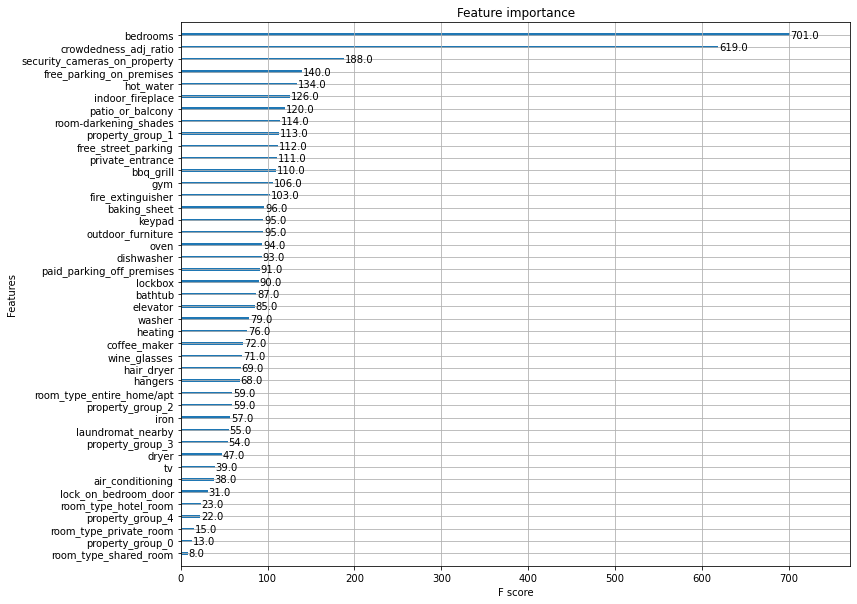

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(12, 10))
plot_importance(XGB, ax=ax); 

In [ ]:
# view outliers for training

In [ ]:
# model = LinearRegression()
# model.fit(X_train, y_train)
# y_pred_train = model.predict(X_train)

In [ ]:
# X_train['room_type'] = X_train[['room_type_entire_home/apt',
#                                 'room_type_hotel_room', 
#                                 'room_type_private_room',
#                                 'room_type_shared_room']].idxmax(axis=1).str[10:].str.capitalize().str.replace('_', ' ')

# predicted = pd.Series(y_pred_train, index=X_train.index, name='price')
# train = X_train.join(predicted)
# train['room_type'] = train['room_type'].astype('category')

# plt.figure(figsize=(15, 6))
# ax = sns.boxplot(x = 'price', y = 'room_type', orient = 'h', data=train).set(title='Room Type vs. Price');

In [ ]:
# view outliers for testing

In [ ]:
# X_test['room_type'] = X_test[['room_type_entire_home/apt',
#                               'room_type_hotel_room', 
#                               'room_type_private_room',
#                               'room_type_shared_room']].idxmax(axis=1).str[10:].str.capitalize().str.replace('_', ' ')

# predicted = pd.Series(y_pred, index=X_test.index, name='price')
# test = X_test.join(predicted)
# test['room_type'] = test['room_type'].astype('category')

# plt.figure(figsize=(15, 6))
# ax = sns.boxplot(x = 'price', y = 'room_type', orient = 'h', data=test).set(title='Room Type vs. Price');